# Student Details
>Name: Brent Moran <br>
>Course: CS 5402 <br>
>Assignment: Semester project for date mining <br>
>Date: 2021-7-30 
# Concept Description:
>It is not entirely clear who wrote the book "Frankenstein". Though it is commonly accepted to be written by Mary Shelley there has been some debate. According to our assignment "The story of the origin of Frankenstein is almost as fanciful as the story itself.  It was written as a writing challenge between Lord Byron, John Polidori, Marry Wollstonecraft Shelly, and Percy Bysshe Shelley while the four shared a lake house in Geneva, Switzerland.  I reference the following History.com article as a source on the origin of the Frankenstein novel.  https://www.history.com/news/frankenstein-true-story-mary-shelley (Links to an external site.)

>There is apparently some controversy on who the actual author of Frankenstein was.  I reluctantly reference the following self promotional article that declares the authorship of Frankenstein to be Percy Shelly, and not Mary."

<br>

> It is my goal to use data mining tools to help determing who the author may have been. 


In [34]:
from collections import Counter
import nltk
from collections import OrderedDict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn import metrics
import seaborn
import string

#Only have to run the bottom two lines here once. After the packages are installed no need to run again.
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')





# Data Gathering and Wrangling
>In order to gather my data. I picked the most popular book, excluding Frankenstein for each of the authors from gutenberg.org. I then handcopied and pasted plain text into text files, removed things like forwards written bu other authors. Then I had it all read in using the software below. Since I am going to used instance based approches to train my models, I broke their books down into 1000 work increments, removed punctuation, and used nltk to convert those 1000 works into part of speech values. I divided these values into the total of the pos tags so that all of my instances would be made up of a consistend ratio out of one. 

CC	coordinating conjunction<br>
CD	cardinal digit<br>
DT	determiner<br>
EX	existential there<br>
FW	foreign word<br>
IN	preposition/subordinating conjunction<br>
JJ	This NLTK POS Tag is an adjective (large)<br>
JJR	adjective, comparative (larger)<br>
JJS	adjective, superlative (largest)<br>
LS	list market<br>
MD	modal (could, will)<br>
NN	noun, singular (cat, tree)<br>
NNS	noun plural (desks)<br>
NNP	proper noun, singular (sarah)<br>
NNPS	proper noun, plural (indians or americans)<br>
PDT	predeterminer (all, both, half)<br>
POS	possessive ending (parent\ 's)<br>
PRP	personal pronoun (hers, herself, him,himself)<br>
PRP$	possessive pronoun (her, his, mine, my, our )<br>
RB	adverb (occasionally, swiftly)<br>
RBR	adverb, comparative (greater)<br>
RBS	adverb, superlative (biggest)<br>
RP	particle (about)<br>
TO	infinite marker (to)<br>
UH	interjection (goodbye)<br>
VB	verb (ask)<br>
VBG	verb gerund (judging)<br>
VBD	verb past tense (pleaded)<br>
VBN	verb past participle (reunified)<br>
VBP	verb, present tense not 3rd person singular(wrap)<br>
VBZ	verb, present tense with 3rd person singular (bases)<br>
WDT	wh-determiner (that, what)<br>
WP	wh- pronoun (who)<br>
WRB	wh- adverb (how)<br>

>These are the avaliable tags. I chose to go with an approach of having the ratio of each of the tags recorded and each 1000 words would be an instance that I can use to train the model. I chose to use 1000 words becuase of the papers you provided us to read. <br>
> My biggest issue was finding books that were about the same size. This could not be done. I could only find about 10000 words of text written by Jon Polodori. This is another reason I decided to go with a ratio approach. <br>
>Another issue is that not every block of 1000 words had everytag that nltk can produce. So that had to be accounted for. To keep in in order I had to grab all of the values returned in the dictionary with get methods, in a certain order, and return a default of 0 if it did not have that value. This cleared up my issue with missing value and order all at the same time. As I divided each authors book, I also tagged their instances with their respective initials. <br><br>
>After all of this was done, it was written to a csv file to be imported.


In [5]:
count = 0
newString = ""
writeable = ""
orderedKeyList = ['CC', 'CD', 'DT', 'EX', 'FW', 
                  'IN', 'JJ', 'JJR', 'JJS', 'MD', 
                  'NN', 'NNP', 'NNS', 'PDT', 'PRP', 
                  'PRP$', 'RB', 'RBR', 'RBS', 'RP', 
                  'TO', 'VB', 'VBD', 'VBG', 'VBN', 
                  'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']

f = open("testfile.csv", "w")

for x in orderedKeyList:
    f.write(x)
    f.write(",")
f.write("Author")
f.write("\n")

with open('ps.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            newString = newString + word
            newString = newString + " "
            count+=1
            
            if(count == 1000):
                op_string = newString.translate(str.maketrans('', '', string.punctuation))
                lower_case = op_string.lower()
                tokens = nltk.word_tokenize(lower_case)
                tags = nltk.pos_tag(tokens)
                counts = Counter( tag for word,  tag in tags)
                val= sum(counts.values())
               
                counts = OrderedDict(sorted(counts.items()))
                for x in orderedKeyList:
                    writeable = counts.get(x,'0')
                    f.write(str(int(writeable)/val))
                    f.write(",")
                f.write("ps")
                f.write("\n")
                newString = ""
                count = 0
                
count = 0
newString = ""
                
with open('ms.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            newString = newString + word
            newString = newString + " "
            count+=1
            
            if(count == 1000):
                op_string = newString.translate(str.maketrans('', '', string.punctuation))
                lower_case = op_string.lower()
                tokens = nltk.word_tokenize(lower_case)
                tags = nltk.pos_tag(tokens)
                counts = Counter( tag for word,  tag in tags)
                val= sum(counts.values())
               
                counts = OrderedDict(sorted(counts.items()))
                for x in orderedKeyList:
                    writeable = counts.get(x,'0')
                    f.write(str(int(writeable)/val))
                    f.write(",")
                f.write("ms")
                f.write("\n")
                newString = ""
                count = 0
                
count = 0
newString = ""
                
with open('jp.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            newString = newString + word
            newString = newString + " "
            count+=1
            
            if(count == 1000):
                op_string = newString.translate(str.maketrans('', '', string.punctuation))
                lower_case = op_string.lower()
                tokens = nltk.word_tokenize(lower_case)
                tags = nltk.pos_tag(tokens)
                counts = Counter( tag for word,  tag in tags)
                val= sum(counts.values())
               
                counts = OrderedDict(sorted(counts.items()))
                for x in orderedKeyList:
                    writeable = counts.get(x,'0')
                    f.write(str(int(writeable)/val))
                    f.write(",")
                f.write("jp")
                f.write("\n")
                newString = ""
                count = 0
                
count = 0
newString = ""
                
with open('lb.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            newString = newString + word
            newString = newString + " "
            count+=1
            
            if(count == 1000):
                op_string = newString.translate(str.maketrans('', '', string.punctuation))
                lower_case = op_string.lower()
                tokens = nltk.word_tokenize(lower_case)
                tags = nltk.pos_tag(tokens)
                counts = Counter( tag for word,  tag in tags)
                val= sum(counts.values())
               
                counts = OrderedDict(sorted(counts.items()))
                for x in orderedKeyList:
                    writeable = counts.get(x,'0')
                    f.write(str(int(writeable)/val))
                    f.write(",")
                f.write("lb")
                f.write("\n")
                newString = ""
                count = 0
                
count = 0
newString = ""
f.close()

# Data Import and Display

In [3]:
df = pd.read_csv("authatt.csv")
df

CC        CD        DT        EX        FW        IN        JJ  \
0    0.058000  0.007000  0.118000  0.004000  0.000000  0.159000  0.064000   
1    0.064000  0.004000  0.112000  0.002000  0.001000  0.131000  0.068000   
2    0.051896  0.008982  0.125749  0.000000  0.000000  0.140719  0.077844   
3    0.066866  0.003992  0.127745  0.001996  0.000000  0.143713  0.080838   
4    0.043000  0.003000  0.126000  0.003000  0.000000  0.146000  0.070000   
..        ...       ...       ...       ...       ...       ...       ...   
282  0.032934  0.003992  0.101796  0.008982  0.000998  0.120758  0.095808   
283  0.057000  0.001000  0.109000  0.000000  0.000000  0.127000  0.104000   
284  0.068000  0.006000  0.106000  0.006000  0.000000  0.124000  0.099000   
285  0.060000  0.007000  0.083000  0.002000  0.000000  0.122000  0.096000   
286  0.048048  0.007007  0.115115  0.001001  0.000000  0.125125  0.102102   

          JJR       JJS        MD  ...       VBD       VBG       VBN  \
0    0.005000  0.003000  0.010000  ...  0.007000  0.006000  0.020000   
1    0.001000  0.000000  0.017000  ...  0.022000  0.024000  0.034000   
2    0.000998  0.001996  0.011976  ...  0.010978  0.012974  0.034930   
3    0.002994  0.000998  0.016966  ...  0.010978  0.006986  0.028942   
4    0.001000  0.002000  0.018000  ...  0.005000  0.014000  0.030000   
..        ...       ...       ...  ...       ...       ...       ...   
282  0.007984  0.004990  0.014970  ...  0.059880  0.014970  0.024950   
283  0.004000  0.002000  0.016000  ...  0.045000  0.014000  0.017000   
284  0.007000  0.005000  0.010000  ...  0.050000  0.013000  0.023000   
285  0.003000  0.004000  0.013000  ...  0.052000  0.015000  0.017000   
286  0.006006  0.003003  0.008008  ...  0.055055  0.013013  0.029029   

          VBP       VBZ       WDT        WP       WP$       WRB  Author  
0    0.042000  0.040000  0.022000  0.014000  0.002000  0.003000      ps  
1    0.030000  0.041000  0.014000  0.017000  0.001000  0.001000      ps  
2    0.049900  0.035928  0.019960  0.010978  0.000000  0.005988      ps  
3    0.026946  0.042914  0.017964  0.004990  0.003992  0.005988      ps  
4    0.027000  0.045000  0.029000  0.005000  0.000000  0.002000      ps  
..        ...       ...       ...       ...       ...       ...     ...  
282  0.019960  0.016966  0.009980  0.008982  0.001996  0.003992      lb  
283  0.027000  0.010000  0.002000  0.008000  0.001000  0.008000      lb  
284  0.032000  0.012000  0.008000  0.012000  0.001000  0.005000      lb  
285  0.027000  0.018000  0.013000  0.012000  0.003000  0.006000      lb  
286  0.029029  0.020020  0.012012  0.010010  0.001001  0.007007      lb  

[287 rows x 32 columns]

## Checking for null values 

In [4]:
df.isnull().sum()
null_data = df[df.isnull().any(axis=1)]
mylist = null_data.index.values.tolist()
null_data

Empty DataFrame
Columns: [CC, CD, DT, EX, FW, IN, JJ, JJR, JJS, MD, NN, NNP, NNS, PDT, PRP, PRP$, RB, RBR, RBS, RP, TO, VB, VBD, VBG, VBN, VBP, VBZ, WDT, WP, WP$, WRB, Author]
Index: []

[0 rows x 32 columns]

## Displaying some graphs

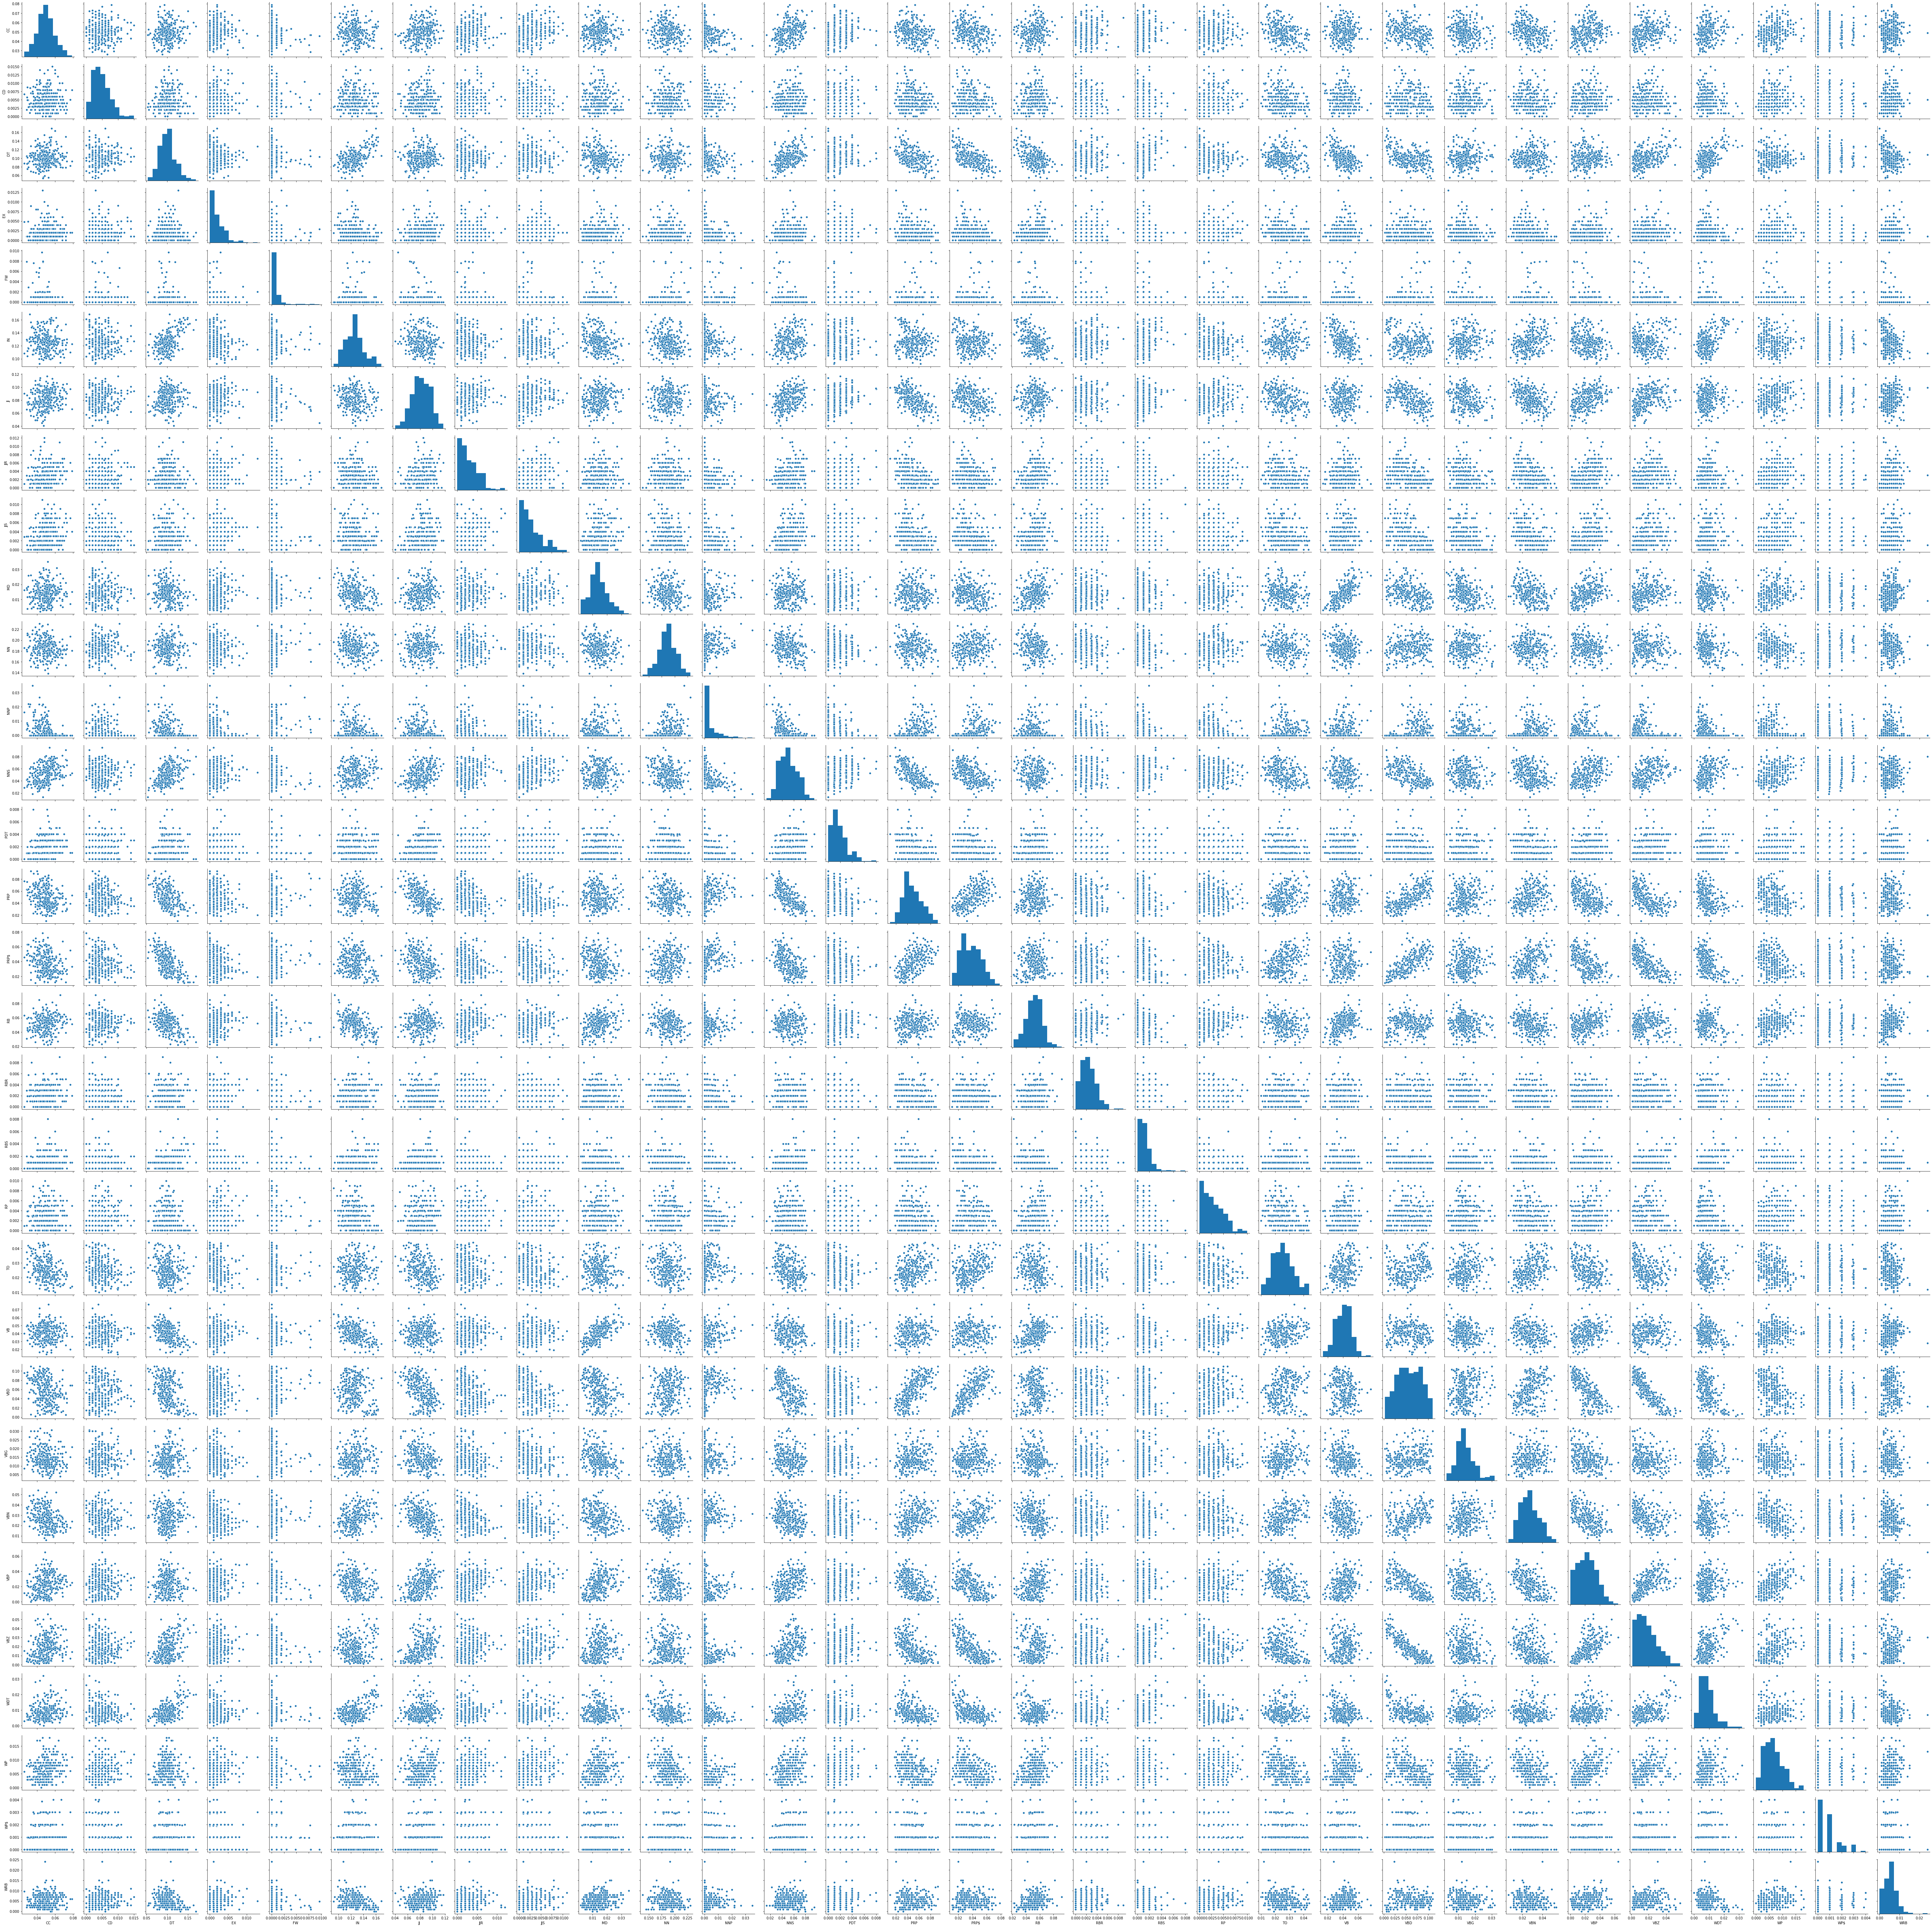

In [5]:
seaborn.pairplot(df)

## Displaying some more specific data
> The values of NN and IN were the two values with the highest counts, so I am going display them. In doing so, it becomes very clear that some authors can easily be identified with some attributes. For example Mary Shelley is pretty much the only author to have FW ratios above 0.004 also when considerdering NNP Mary Shelley is the only author above 0.005 in which they have numerous above that amount. Given this I believe this data will be able to accurately predict authorship. 

/Users/brentmoran/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


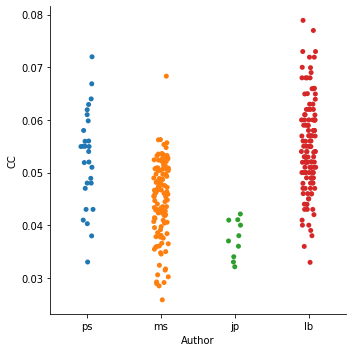

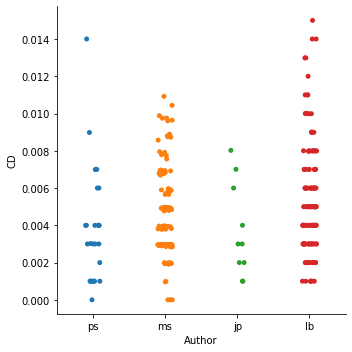

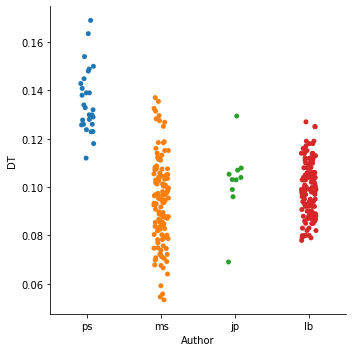

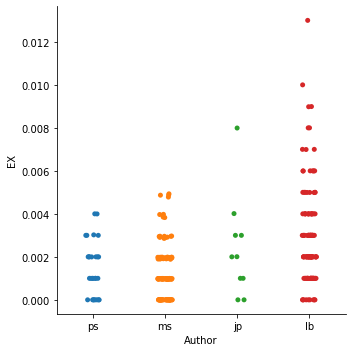

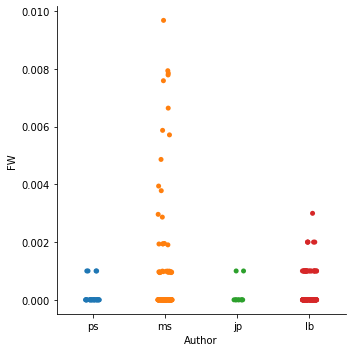

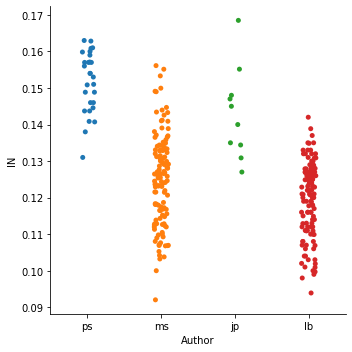

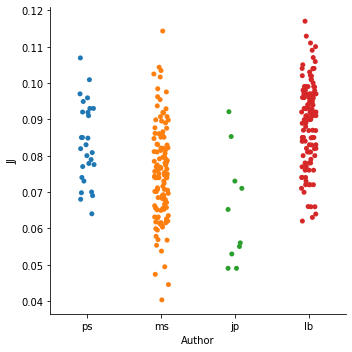

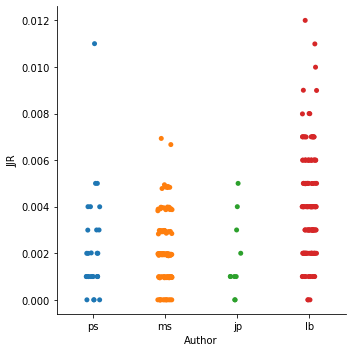

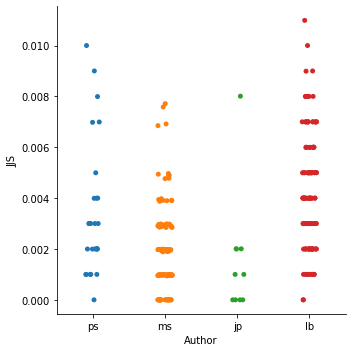

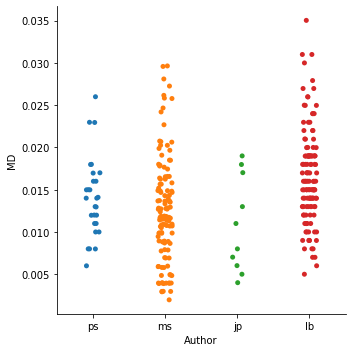

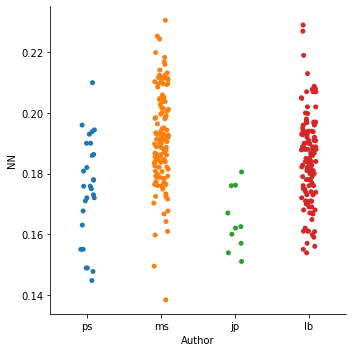

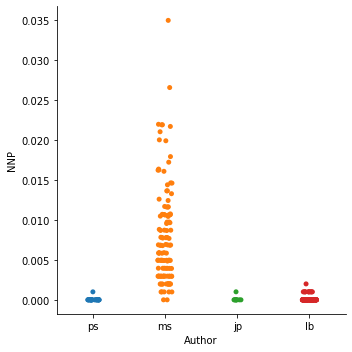

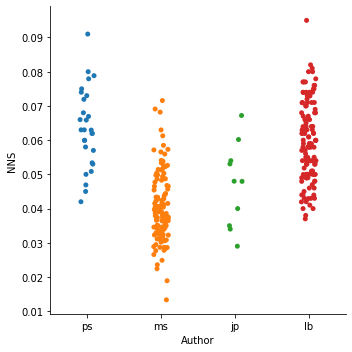

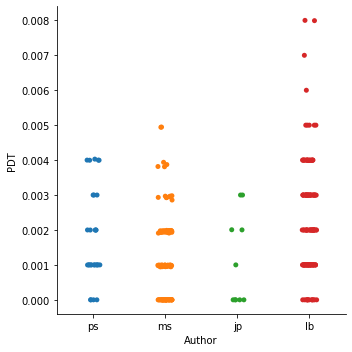

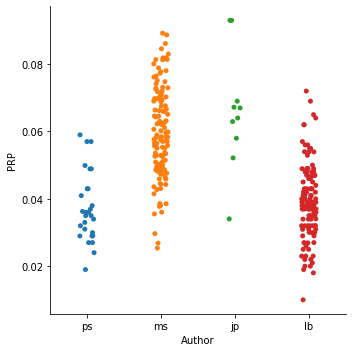

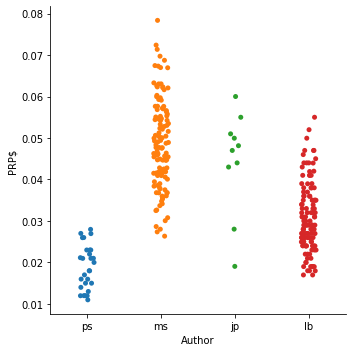

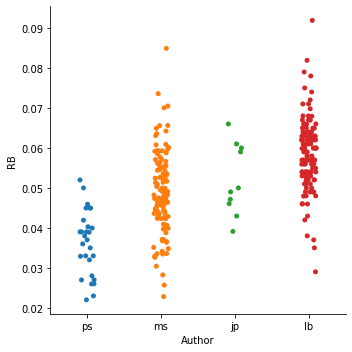

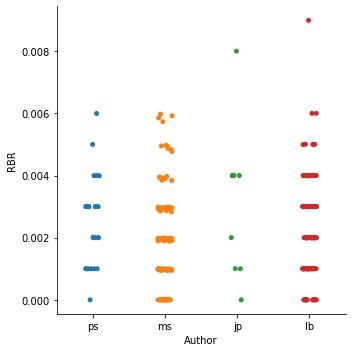

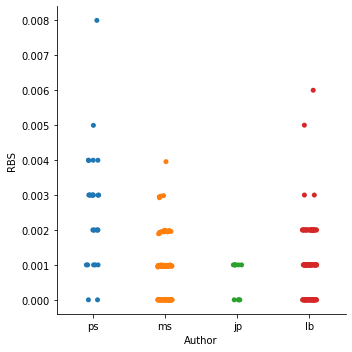

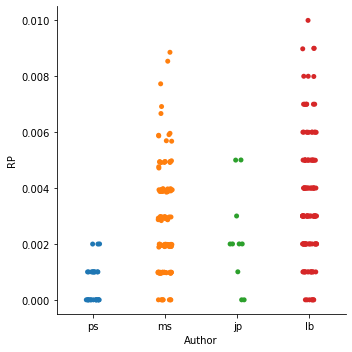

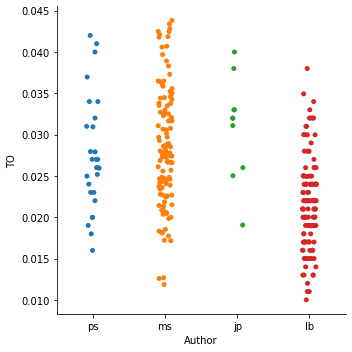

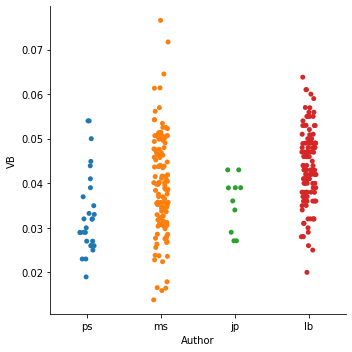

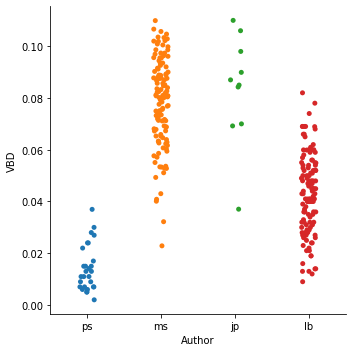

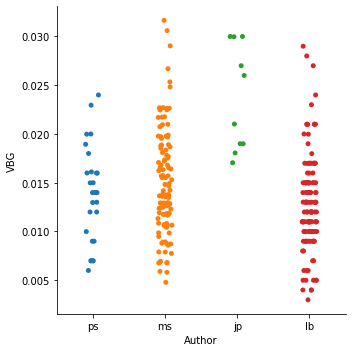

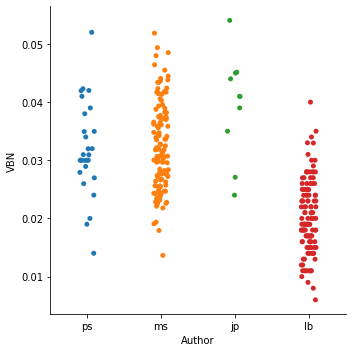

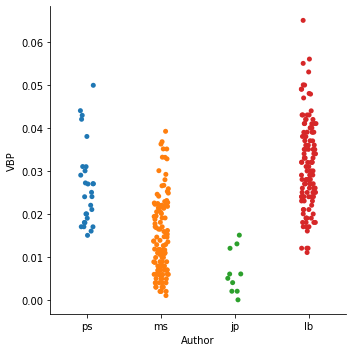

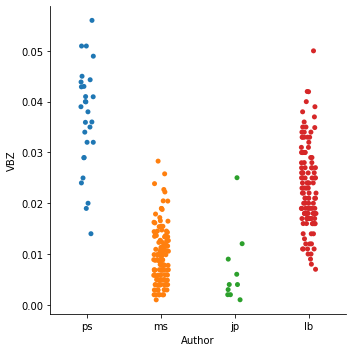

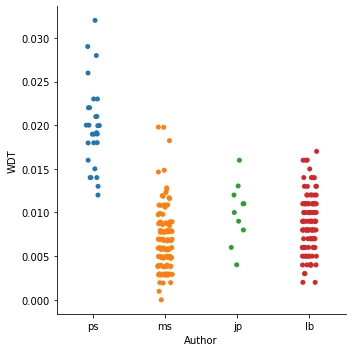

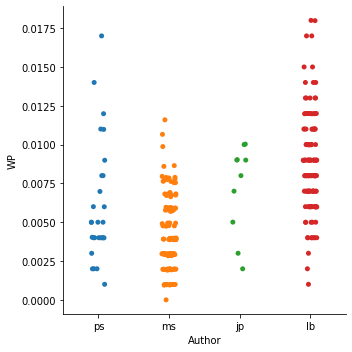

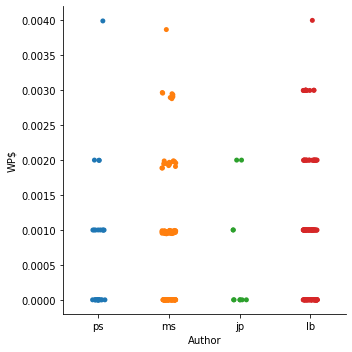

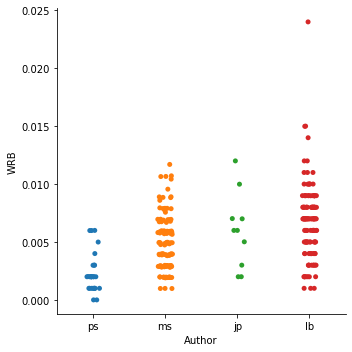

In [6]:
for x in orderedKeyList:
    data = data = df[[x, "Author"]]
    seaborn.catplot(x="Author", y=x, data = data)


## Technique one K-Nearest Neighbors
### Traning and Analysis - Split test and Training Data


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 31].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Normalization of Data

In [9]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN with results

Text(0, 0.5, 'Error Rate')

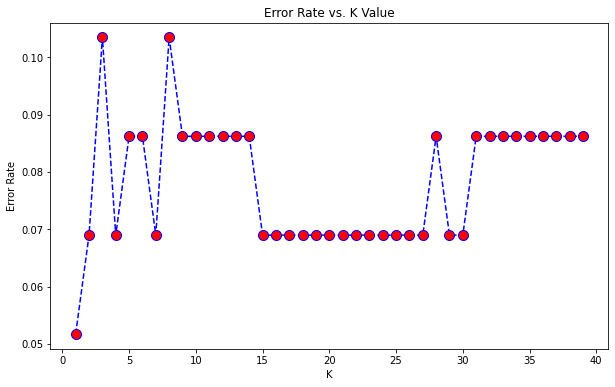

In [25]:
error_rate = []
for i in range(1,40):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [33]:
minIndex = error_rate.index(min(error_rate))
print("Accuracy: " + str(1-error_rate[minIndex])+ " with a k value of: "+str(minIndex+1))

Accuracy: 0.9482758620689655 with a k value of: 1


## Technique two - Naive Bayes
### Traning and Analysis - Split test and Training Data

In [26]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 31].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Naive Bayes with results

In [29]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9655172413793104


## Technique three - Support Vector Machine
### SVM training and results

In [35]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.3620689655172414


# Reading in Frankenstein
>Below I read in Frankenstein, turned it into a ratio list as done above. I then manually added the values it printed out into the twodfranks list. I had to add it to a 2d array so it would work with the functions. Then I had it print out the predictions of author. Which it did predict ms or Mary Shelley. 

In [44]:
franks = []
with open('fs.txt','r') as file:
   
    # reading each line    
    for line in file:
   
        # reading each word        
        for word in line.split():
   
            newString = newString + word
            newString = newString + " "
            
            
            
op_string = newString.translate(str.maketrans('', '', string.punctuation))
lower_case = op_string.lower()
tokens = nltk.word_tokenize(lower_case)
tags = nltk.pos_tag(tokens)
counts = Counter( tag for word,  tag in tags)
val= sum(counts.values())
               
counts = OrderedDict(sorted(counts.items()))
for x in orderedKeyList:
    writeable = counts.get(x,'0')
    franks.append(int(writeable)/val)
    
twodfranks = [[0.05160329, 0.00418558, 0.09588536, 0.00076617, 0.00043984, 0.12515607,
 0.07192111, 0.00194381, 0.00200057, 0.01610386, 0.18558456, 0.00414302,
 0.04554484, 0.00107832, 0.05136209, 0.04344495, 0.05045403, 0.00188706,
 0.00096481, 0.00183031, 0.02724177, 0.04299092, 0.07385074, 0.01223042,
 0.03522985, 0.0203462,  0.00892452, 0.01000284, 0.00509364, 0.00062429,
 0.00712259]]
print(franks)
print("\n")
print("Author prediction using Naive Bayes: " + str(gnb.predict(twodfranks)))                

[0.051603291713961406, 0.004185584562996595, 0.09588535754824064, 0.0007661748013620886, 0.0004398410896708286, 0.1251560726447219, 0.0719211123723042, 0.0019438138479001136, 0.002000567536889898, 0.016103859250851307, 0.1855845629965948, 0.004143019296254257, 0.04554483541430193, 0.0010783200908059023, 0.05136208853575482, 0.04344494892167991, 0.050454029511918276, 0.0018870601589103292, 0.0009648127128263337, 0.0018303064699205448, 0.02724177071509648, 0.04299091940976164, 0.07385073779795687, 0.012230419977298524, 0.035229852440408625, 0.020346197502837685, 0.008924517593643587, 0.010002837684449489, 0.005093643586833144, 0.0006242905788876277, 0.007122587968217934]


Author prediction using Naive Bayes: ['ms']


# Conclusions
> It is clear that SVM is not good at all at predicting the author in these circumstances. KNN did really well with and accuracy of 94.8 percent using a k value of 1. However, it was still beat out by naive bayes which I honestly expected. Naive Bayes acheived and accuracy of 96.5 percent. This is the model that I would use out of the three that I attempted. <br><br>

>In the cell above we ran the Frankenstein book through our Naive Bayes based model. It was able to correctly "according to common belief" attribute the authorship of Frankenstein to Mary Shelley. 

# Sources
https://www.guru99.com/pos-tagging-chunking-nltk.html<br>
https://www.nltk.org/book/ch05.html<br>
https://stackoverflow.com/questions/52933862/sklearn-or-pandas-impute-missing-values-with-simple-linear-regression<br> 
https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn<br>
https://www.geeksforgeeks.org/python-seaborn-pairplot-method/<br>
https://towardsdatascience.com/data-science-titanic-challenge-solution-dd9437683dcf<br>
https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/<br>
https://datascienceplus.com/k-nearest-neighbors-knn-with-python/<br>
https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python